# ANALIZA ŠTUDENSTKEGA DELA

#### Avtor: Jan Šifrer

Za projektno nalogo sem si izbral analizo študenskega dela. Vse potrebne podatke za to sem dobil na spletni strani https://www.studentski-servis.com/studenti. Moj cilj je, da pokažem kje se najbolje splača delati šudentom - torej v katerih mestih, za katera dela dobivajo najvišijo plačo in predvsem kako sta vrsta dela ter delavnik odvisna od plačila. 

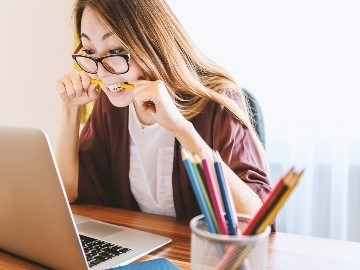



Najprej naložimo pakete:

In [21]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plot
from funkcije import boljsa_lokacija
from funkcije import koliko_besed_je_v_imenu


#Nastavil sem, da izpiše samo 10 vrstic, zato da lažje delam
pd.options.display.max_rows = 15

Nastavimo stil risanja:

In [22]:
%matplotlib inline

Naložimo še podatke s katere bomo preučevali:

In [23]:
podatki = pd.read_csv("prosta_dela1.csv")

LA

In [24]:
podatki

,naslov,podnaslov,neto_placa,bruto_placa,lokacija,opis,stevilo_mest,trajanje,delovnik,sifra,narava_dela
0,PROGRAMIRANJE,NaN,"7,60 €/h neto","9,00 €/h bruto",MARIBOR,Razvoj programske opreme na strani strežnika. ...,1,DLJE ČASA (OBČASNO),Po dogovoru,308948,začasno in občasno delo
1,DELJENJE LETAKOV,NaN,"4,13 €/h neto","4,89 €/h bruto",LJUBLJANA RUDNIK,Deljenje letakov v okolici trgovine. Delovni č...,2,1 TEDEN,Po dogovoru,308947,NaN
2,PRODAJA,NaN,"5,50 €/h neto","6,51 €/h bruto",LJUBLJANA,Prodaja v čokoladnici v stari Ljubljani. Podje...,1,"DLJE ČASA (OBČASNO), PO DOGOVORU",Izmensko,308946,začasno in občasno delo
3,POMOČ UPORABNIKOM,NaN,"5,00 €/h neto","5,92 €/h bruto",LJUBLJANA CENTER,Mlado in energično mednarodno podjetje išče os...,1,DLJE ČASA (OBČASNO),Izmensko,308945,začasno in občasno delo
4,BLAGAJNIK,NaN,"4,13 €/h neto","4,89 €/h bruto",KRANJ,"Podjetje išče polnoletne, komunikativne in sam...",4,DLJE ČASA (OBČASNO),Popoldan,308944,začasno in občasno delo
...,...,...,...,...,...,...,...,...,...,...,...
3012,STREŽBA,NaN,"4,22 €/h neto","5,00 €/h bruto",KRANJ,Strežba v piceriji. Pogoji: starost nad 17 let...,1,PO DOGOVORU,Po dogovoru,239844,začasno in občasno delo
3013,STREŽBA,NaN,PO DOGOVORU,NaN,SEVNICA,Zavod potrebuje več polnoletnih oseb za strežb...,3,PO DOGOVORU,Izmensko,239563,začasno in občasno delo
3014,PROGRAMIRANJE,NaN,PO DOGOVORU,NaN,LJUBLJANA BEŽIGRAD,Delo obsega programiranje WEB aplikacij. Potre...,2,DLJE ČASA (OBČASNO),Dopoldan,236397,začasno in občasno delo
3015,STREŽBA,NaN,"5,00 €/h neto","5,92 €/h bruto",LJUBLJANA,"Iščejo polnoletno, prijazno, pošteno in urejen...",2,PO DOGOVORU,Izmensko,234805,začasno in občasno delo


# # # # # # # # # #Najprej bom pogledal katera so tista mesta, kjer študentje lahko najdejo največ prsotih delovnih mest.

In [25]:
pd.set_option('display.max_rows', 4000)

In [26]:
podatki["boljsa_lokacija"] = podatki["lokacija"].apply(boljsa_lokacija)
podatki["stevilo_besed"] = podatki["boljsa_lokacija"].apply(koliko_besed_je_v_imenu)


Text(0.5, 0, 'Lokacija')

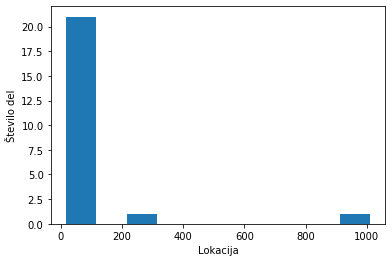

In [27]:
spremenit = podatki["stevilo_besed"] == 1
# podatki.groupby("stevilo_besed").size()
kaj = podatki[spremenit].groupby("boljsa_lokacija").size() > 15
lol = podatki[spremenit].groupby("boljsa_lokacija").size()
k = lol[kaj]
plot.hist(k)
plot.ylabel("Število del")
plot.xlabel("Lokacija")

# # # # # # # Pogledajmo sedaj kakšne plače so v povprečju za dela, in izbrišimo tiste Neto plače, katere sploh niso neto!

In [32]:
p = podatki.groupby("neto_placa").size()
p[p > 2]

neto_placa
10,00 €/h neto                  24
10,14 €/h neto                   8
11,00 €/h neto                   4
12,00 €/h neto                   6
12,67 €/h neto                   3
4,13 €/h neto                  314
4,14 €/h neto                    6
4,17 €/h neto                    3
4,20 €/h neto                   15
4,22 €/h neto                  156
4,23 €/h neto                   39
4,30 €/h neto                   10
4,31 €/h neto                   10
4,36 €/h neto                    6
4,39 €/h neto                   19
4,40 €/h neto                    4
4,48 €/h neto                   25
4,50 €/h neto                  191
4,56 €/h neto                    9
4,61 €/h neto                    3
4,65 €/h neto                  142
4,70 €/h neto                   14
4,73 €/h neto                   24
4,75 €/h neto                    4
4,80 €/h neto                   18
4,82 €/h neto                    6
4,88 €/h neto                    3
4,89 €/h neto                    6
4,90 €/h 

In [8]:
#preimenoval sem imena stolpcev
#podatki = podatki.rename({"naslov": "Naslov", "podnaslov": "Podnaslov", "neto_placa": "Neto plača",
#                          "bruto_placa": "Bruto plača","lokacija": "Lokacija", "opis": "Opis",
 #                         "stevilo_mest": "Število mest", "trajanje": "Trajanje", "delovnik": "Delovnik",
  #                        "sifra": "Šifra", "narava_dela": "Narava dela"}, axis=1)

In [9]:
#preimenoval sem imena stolpcev
podatki = podatki.rename({"neto_placa": "neto plača",
                          "bruto_placa": "bruto plača",
                          "stevilo_mest": "število mest",
                          "sifra": "šifra", "narava_dela": "narava dela"}, axis=1)

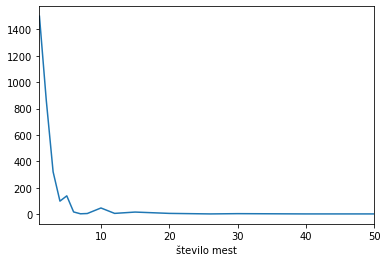

In [10]:
stevilo = podatki.groupby("število mest").size()
stevilo.plot()

In [11]:
# def razbitje_imen(x):
#     if x == "ŽIVALSKI VRT LJUBLJANA":
#         razbitje = "LJUBLJANA"
#     else: 
#         razbitje = x.split()
#     return razbitje[0]
# def koliko_besed_je_v_imenu(x):
#     return len(x.split())
    

In [12]:
# razbitje_imen("tra la la la la")
# razbitje = podatki["lokacija"].apply(koliko_besed_je_v_imenu)


In [13]:
# podatki["novo"] = razbitje
# podatki.groupby("lokacija").size()

In [14]:
podatki[["naslov", "opis", "šifra"]]

,naslov,opis,šifra
0,PROGRAMIRANJE,Razvoj programske opreme na strani strežnika. ...,308948
1,DELJENJE LETAKOV,Deljenje letakov v okolici trgovine. Delovni č...,308947
2,PRODAJA,Prodaja v čokoladnici v stari Ljubljani. Podje...,308946
3,POMOČ UPORABNIKOM,Mlado in energično mednarodno podjetje išče os...,308945
4,BLAGAJNIK,"Podjetje išče polnoletne, komunikativne in sam...",308944
5,DELO S STRANKAMI,Podjetje potrebuje osebo za pomoč strankam za ...,308943
6,STREŽBA,"Strežba v lokalu v centru Ljubljane, pri Zmajs...",308942
7,POMOČ PRI PRODAJI,Podjetje potrebuje osebo za pomoč pri prodaji ...,308941
8,ADMINISTRATIVNA DELA,V trgovini z lesom in lesnimi polizdelki (veza...,308940
9,TEHNIČNA POMOČ,Zavod potrebuje na drsališču pomoč pri organiz...,308937
